In [ ]:
path_to_image_1 = '/content/photo_task_1.jpg'
path_to_image_2 = '/content/photo_task_2.jpg'
path_to_image_3 = '/content/photo_task_3.jpg'

In [ ]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from skimage.io import imread, imsave
import cv2
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Задание 1
Загрузить объекты из новостного датасета 20 newsgroups, по темам "космос" и "атеизм".
Взять TF-IDF для всех текстов. Подобрать лучший минимальный параметр C из множества 10^-7, 10^-4, ... 10^4, 10^7 для SVM с линейным ядром при помощи кросс-валидации по 5 блокам, обучить SVM с этим параметром и найти 5 слов с наибольшим абсолютным значением веса

In [ ]:
newsgroups = fetch_20newsgroups(subset="all", categories=["alt.atheism", "sci.space"], remove=['headers', 'footers', 'quotes'])

In [ ]:
print(newsgroups.data[0])



Every time somone writes something and says it is merely describing the norm,
it is infact re-inforcing that norm upon those programmed not to think for
themselves. The motto is dangerous in itself, it tells the world that every
*true* American is god-fearing, and puts down those who do not fear gods. It
doesn't need anyone to make it dangerous, it does a good job itself by just
existing on your currency.


The Desert Brat


In [ ]:
!pip install -q contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 7.4 MB/s eta 0:00:00


In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import contractions
import string

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def remove_case(text):
  return text.lower()

def remove_storwords(text):
  return " ".join([word for word in text.split() if word not in (stop_words)])

def remove_word_ending(text):
   return " ".join([stemmer.stem(word) for word in text.split()])

def remove_extra_space(text):
  return " ".join(text.split())

def expand_contractions(text):
    expanded_words = []
    for word in text.split():
       expanded_words.append(contractions.fix(word))
    return " ".join(expanded_words)

def remove_punctuation(text):
    return "".join([c for c in text if c not in string.punctuation])

def remove_email(text):
  email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,7}\b'
  text = re.sub(email_pattern, '', text)
  return text

def clean(text):
  text = remove_case(text)
  text = expand_contractions(text)
  text = remove_storwords(text)
  text = remove_email(text)
  text = remove_punctuation(text)
  text = remove_extra_space(text)
  text = remove_word_ending(text)
  return text

def clean_all_text(list):
  for i in range(len(list)):
    list[i] = clean(list[i])
  return list

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
newsgroups.data = clean_all_text(newsgroups.data)

In [ ]:
print(newsgroups.data[0])

everi time somon write someth say mere describ norm infact reinforc norm upon program think themselv motto danger itself tell world everi true american godfear put fear god need anyon make danger good job exist currenc desert brat


In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(newsgroups.data)
y = newsgroups.target

In [ ]:
param_grid = {'C': [10e-7, 10e-4, 10e-1, 10e1, 10e4, 10e7]}
svc = SVC(kernel='linear')

In [ ]:
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [1e-06, 0.001, 1.0, 100.0, 100000.0,
                               100000000.0]})

In [ ]:
best_C = grid_search.best_params_['C']
best_svm = SVC(kernel='linear', C=best_C)
best_svm.fit(X, y)

SVC(kernel='linear')

In [ ]:
feature_names = np.array(vectorizer.get_feature_names_out())
top_words = np.argsort(np.abs(best_svm.coef_.toarray()))[0][-5:]
top_words = feature_names[top_words]

In [ ]:
print(f"Лучший параметр C: {best_C}")
print(f"5 слов с наибольшим абсолютным значением веса: {top_words}")

Лучший параметр C: 1.0
5 слов с наибольшим абсолютным значением веса: ['islam' 'religion' 'atheist' 'space' 'god']


# Задание 2
Сшакалить первую картинку с помощью алгоритма k-means (уменьшить количество цветов)
Как ответ нужно несколько промежуточных итераций вплоть до однотонного изображения

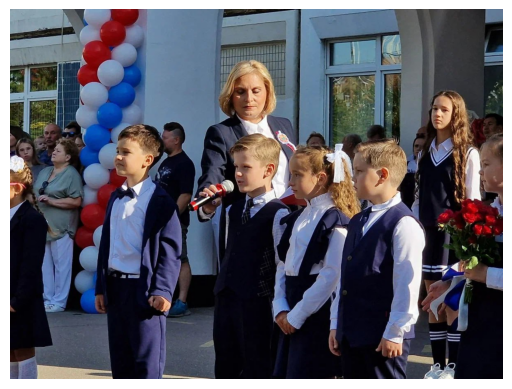

In [ ]:
img_1 = cv2.imread(path_to_image_1)
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
def kmeans_picture(img, n_clusters, show=False, to_print=False):
  pixels = img.reshape(-1, 3)
  n_colors = n_clusters
  kmeans = KMeans(n_clusters=n_colors)
  kmeans.fit(pixels)
  new_colors = kmeans.cluster_centers_
  labels = kmeans.predict(pixels)
  new_image = new_colors[labels].reshape(img.shape).astype(np.uint8)
  if to_print:
    print(f"Количество кластеров: {n_clusters}")
  if show:
    plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

def reducing_colors_kmeans(img, class_array):
  for i in class_array:
    kmeans_picture(img, i, show=True, to_print=True)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Количество кластеров: 20


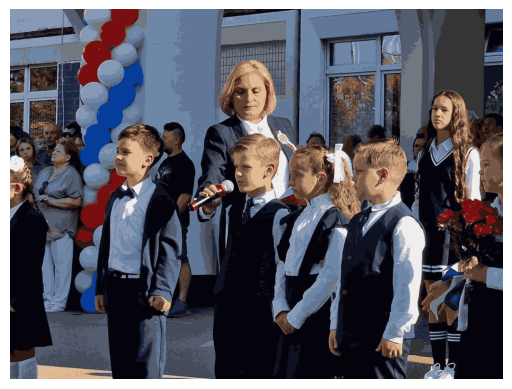

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Количество кластеров: 15


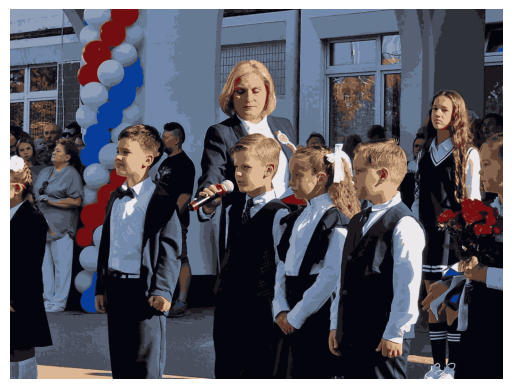

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Количество кластеров: 10


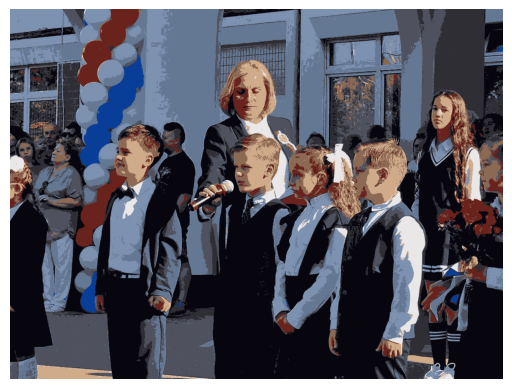

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Количество кластеров: 7


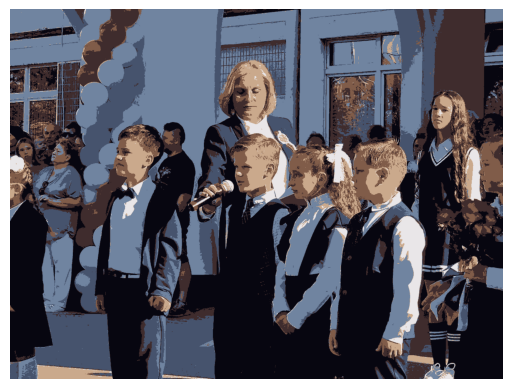

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Количество кластеров: 6


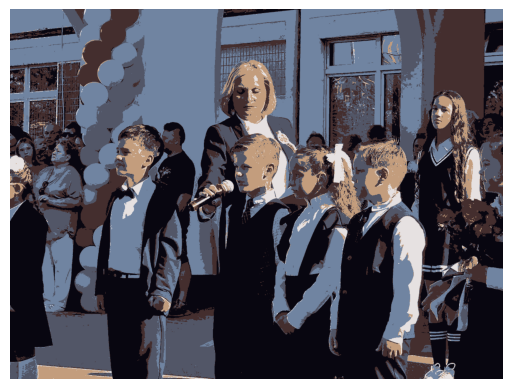

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Количество кластеров: 5


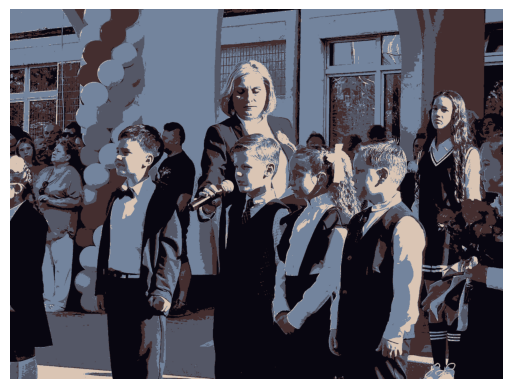

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Количество кластеров: 4


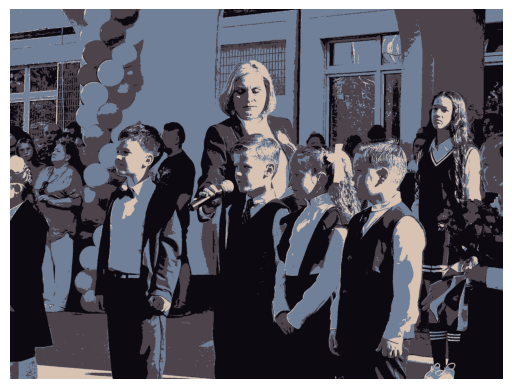

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Количество кластеров: 3


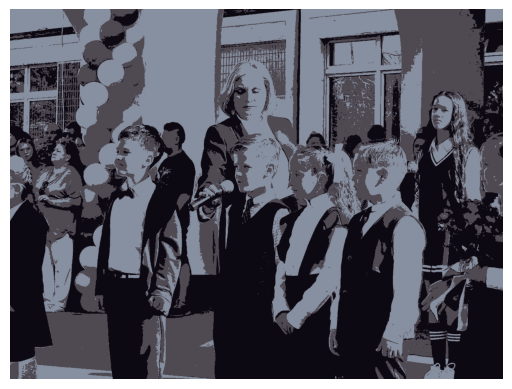

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Количество кластеров: 2


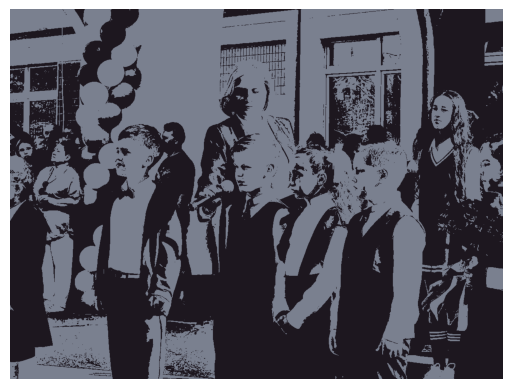

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Количество кластеров: 1


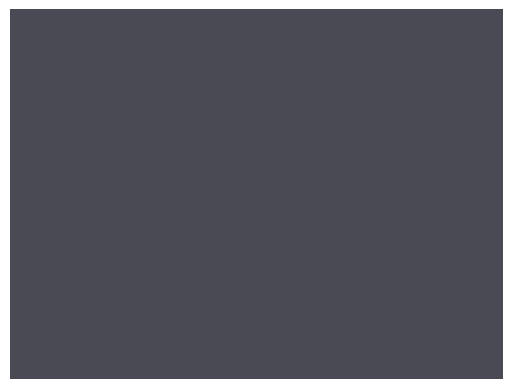

In [ ]:
class_array = [20, 15, 10, 7, 6, 5, 4, 3, 2, 1]
reducing_colors_kmeans(img_1, class_array)

# Задание 3
Распознать текст со второй картинки. Выбор метода на своё усмотрение, можно пользоваться готовыми решениями, ориентир на качество

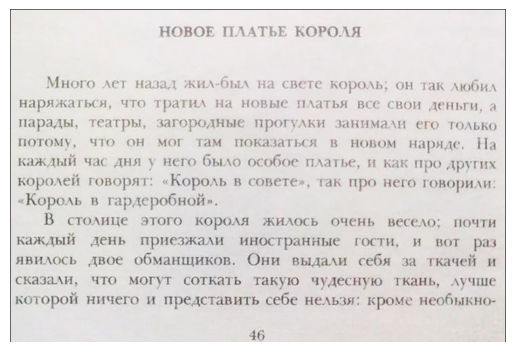

In [ ]:
img_2 = cv2.imread(path_to_image_2)
plt.imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

origin_text = '''
Новое платье короля

Много лет назад жил-был на свете король; он так любил
наряжаться, что тратил на новые платья все свои деньги, а
парады, театры, загородные прогулки занимали его только
потому, что он мог там показаться в новом наряде. На
каждый час дня у него было особое платье, и как про других
королей говорят: 	«Король в совете», так про него говорили:
«Король в гардеробной».

В столице этого короля жилось очень весело; почти
каждый день приезжали иностранные гости, и вот раз
явилось двое обманщиков. Они выдали себя за ткачей и
сказали, что могут соткать такую чудесную ткань, лучше
которой ничего и представить себе нельзя: кроме необыкно-

46
'''

Первый метод: Pytesseract

In [ ]:
!sudo apt install -q tesseract-ocr
!pip install -q pytesseract
!sudo apt-get install -q tesseract-ocr-rus

Reading package lists...
Building dependency tree...
Reading state information...
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
Reading package lists...
Building dependency tree...
Reading state information...
tesseract-ocr-rus is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [ ]:
import pytesseract
text_pytesseract_task_2 = pytesseract.image_to_string(path_to_image_2, lang='rus')
print(text_pytesseract_task_2)

 

НОВОЕ ПЛАТЬЕ КОРОЛЯ

Много лет назад жил-был на свете король; он так любил
наряжаться, что тратил на новые платья все свои деньги, а
парады, театры, загородные прогулки занимали его только
потому, что он мог там показаться в новом наряде, На
каждый час дня у него было особое платье, и как про других
королей говорят: «Король в совете», так про него говорили:
«Король в гардеробной».

В столице этого короля жилось очень весело; почти
каждый день приезжали иностранные гости, и вот раз
явилось двое обманщиков. Они выдали себя за ткачей и
сказали, что могут соткать такую чудесную ткань, лучше
которой ничего и представить себе нельзя: кроме необыкно-

46



In [ ]:
!pip install -q jiwer
import jiwer

In [ ]:
def prepare_text_to_compare(text):
  text = remove_case(text)
  text = remove_extra_space(text)
  return text

def print_wer_accuracy(wer):
  print(f"Word Error Rate: {wer}")
  print(f"Точность: {100 * (1 - wer)}")

def compare_text(text_1, text_2):
  """
  Функция для определения точности распознования текста с учётом пунктуации
  """
  text_1 = prepare_text_to_compare(text_1)
  text_2 = prepare_text_to_compare(text_2)
  print_wer_accuracy(jiwer.wer(text_1, text_2))

In [ ]:
print(jiwer.wer(origin_text, text_pytesseract_task_2))

0.041666666666666664


In [ ]:
print_wer_accuracy(jiwer.wer(origin_text, text_pytesseract_task_2))

Word Error Rate: 0.041666666666666664
Точность: 95.83333333333334


In [ ]:
compare_text(origin_text, text_pytesseract_task_2)

Word Error Rate: 0.009433962264150943
Точность: 99.05660377358491


In [ ]:
def remove_all_punctuation(text):
  translator = str.maketrans('', '', string.punctuation)
  return text.translate(translator)

def prepare_text_to_compare_2(text):
  """
  Функция для сравнения смысловой части текста,
  то есть без знаков препинания
  """
  text = remove_case(text)
  text = remove_punctuation(text)
  text = remove_extra_space(text)
  return text

def compare_text_2(text_1, text_2):
  text_1 = prepare_text_to_compare_2(text_1)
  text_2 = prepare_text_to_compare_2(text_2)
  print_wer_accuracy(jiwer.wer(text_1, text_2))

In [ ]:
compare_text_2(origin_text, text_pytesseract_task_2)

Word Error Rate: 0.0
Точность: 100.0


Второй метод: EasyOCR

In [ ]:
!pip install -q easyocr
import easyocr

In [ ]:
reader = easyocr.Reader(['ru'])

In [ ]:
list_easyocr_2_task = reader.readtext(path_to_image_2)

In [ ]:
def list_to_str(list):
  text = ""
  for i in range(len(list)):
    text += " " + list[i][1]
  return text

In [ ]:
text_easyocr_2_task = list_to_str(list_easyocr_2_task)

In [ ]:
print(text_easyocr_2_task)

 НОВОЕ ПЛАТЬЕ КОРОАЯ Много Аст назад жил-бьх на свсте король; он так ^юбил наряжаться; что трати^ На новые платья все свои деньги, парады;   театры, загородные прогулки Занима А его ТОАЬКО потому, ЧТО он мог там показаться ноцом наряде Йа каж час ДНя него быхо особое пхатье; и как про других королей говорят: Корохь советеж , так про него говорихи: ЖКорсхь гардсробной" - В стоАице Этого короАя жилось очень весело; почти каждый день приезжахи иностранные гостИ , Вот раз явилось двое   обманщиков. Они выдали себя за ткачей сказаАи, что могут соткатъ такую чудесную Тканк; Аучше которой ничего и представить себе нельзя: кроме необыкно- дый


In [ ]:
for (bbox, text, prob) in list_easyocr_2_task:
    print(f'Text: {text}, Probability: {prob}')

Text: НОВОЕ ПЛАТЬЕ КОРОАЯ, Probability: 0.8907298086182515
Text: Много Аст назад жил-бьх на свсте король;, Probability: 0.5186138959574546
Text: он так ^юбил, Probability: 0.6741887993199297
Text: наряжаться; что трати^, Probability: 0.7471322523693038
Text: На новые, Probability: 0.8502704087586918
Text: платья, Probability: 0.5674192017071362
Text: все свои деньги,, Probability: 0.8431274492519931
Text: парады;   театры,, Probability: 0.7106796289712372
Text: загородные, Probability: 0.999885057131927
Text: прогулки, Probability: 0.7432894086878963
Text: Занима А, Probability: 0.51307381812446
Text: его, Probability: 0.9739777365591329
Text: ТОАЬКО, Probability: 0.3685372483872294
Text: потому,, Probability: 0.6803445156125936
Text: ЧТО, Probability: 0.1769017709746503
Text: он, Probability: 0.951218118221086
Text: мог, Probability: 0.9923193191944754
Text: там, Probability: 0.14590189965292108
Text: показаться, Probability: 0.6412169916821595
Text: ноцом, Probability: 0.527499615673

In [ ]:
print_wer_accuracy(jiwer.wer(origin_text, text_easyocr_2_task))

Word Error Rate: 0.5208333333333334
Точность: 47.916666666666664


In [ ]:
compare_text_2(origin_text, text_easyocr_2_task)

Word Error Rate: 0.32075471698113206
Точность: 67.9245283018868


# Задание 4*
Пусть будет со звёздочкой, на интерес
Распознать текст с последней картинки, выбор метода на своё усмотрение, можно пользоваться готовыми решениями, ориентир на качество

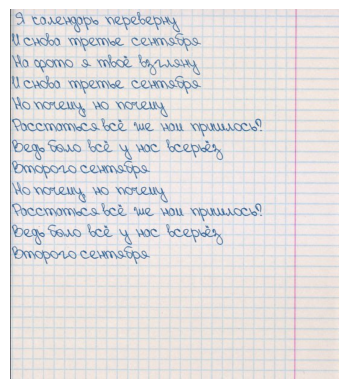

In [ ]:
img_3 = cv2.imread(path_to_image_3)

plt.imshow(cv2.cvtColor(img_3, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

origin_text = '''
Я календарь переверну
И снова третье сентября
На фото я твоё взгляну
И снова третье сентября
Но почему но почему
Расстаться всё же нам пришлось?
Ведь было всё у нас всерьёз
Второго сентября
Но почему но почему
Растаться всё же нам пришлось?
Ведь было всё у нас всерьёз
Второго сентября
'''

In [1]:
text = pytesseract.image_to_string(path_to_image_3, lang='rus')
print(text)

NameError: name 'pytesseract' is not defined

Насчёт 4 задания. Я попробовал open source нейронки: tesseract, easy OCR, открытые модели с huggingface. Всё выдали одинаково плохой результат. Скорее всего нужно было препроцессинг (например прогнать через свертку)картинки сделать, а затем применить fine tuning для текущих моделей которые нашел (на какой нибудь обучающей выборке, которую я бы предварительно собрал). Ну или другие решения глубже можно было бы поискать